Функция генерации определенного количества СВ (для каждого закона)
1) Биномиальное распределение
2) Распределение Бернулли
3) Геометрическое распределение
4) Распределение Пуассона
5) Экспоненциальное распределение
6) Равномерное распределение
7) Нормальное распределение
8) Распределение хи-квадрат
9) Распределение Стьюдента
10) Распределение Фишера
11) Распределение Вейбулла

3 выборки:
до 10
до 20
до 40
до 100
и больше 100 на свой выбор

для выборок посчитать оценки
мат ожиадание
ско в двух видах (смещенная и несмещенная)
медиана

Вторая часть (на следующую пару)
добавить шум (по этому же закону и по другому)
посчитать корреляцию и ковариацию для исходного и зашумленного ряда 

Ход работы:
Загрузим следующие бибилотеки: scipy, numpy, seaborn, matplotlib. И обозначим функции для создания анимации для непрерывных и дискретных распределений.

In [2]:
import scipy.stats as spystats
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np

def getAnimNepr(model, name, ran, bins):
        s = 100

        fig = plt.figure(figsize=(20, 9))
        ax1 = plt.subplot(1, 2, 1)

        ax2 = plt.subplot(1, 2, 2)
        ax2.set_xticks(np.arange(5), [str(10 ** (i + 1)) for i in range(5)])
        mean = model.mean()
        ax2.set_xlim(0, 4)
        ax2.set_ylim(mean - 1, mean + 1)
        meanline, = ax2.plot([], [], 'g', lw=2)
        ax2.plot([0, 4], [mean, mean], 'r', lw=2)
        meanline_list = [[], []]

        def animate(i, *fargs):
                ax1.cla()
                s = 10 ** (i + 1)
                data = model.rvs(size = s)
                ax1.set_ylim(0, 1)
                grid = np.linspace(ran[0], ran[1], 1000)
                ax1.hist(data, bins=100, density=True, range=(ran[0], ran[1]),
                                alpha=0.5, label="Гистограмма выборки")
                ax1.plot(grid, model.pdf(grid), color="red",
                                lw=5, label="Плотность случайной величины")
                ax1.set_title("{}, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(name, s,
                                                        data.mean(), data.std(), np.median(data)), fontsize=15)
                fargs[1][0].append(i)
                fargs[1][1].append(data.mean())
                fargs[0].set_data(fargs[1][0], fargs[1][1])
                ax2.set_ylim(min(min(fargs[1][1]), mean) - 1e-2, max(max(fargs[1][1]), mean) + 1e-2)
                
                #print(i, fargs[0].get_xdata())
                
        args = (meanline, meanline_list)
        anim = animation.FuncAnimation(fig, animate, fargs=args, frames=5, interval=1000)
        return anim

def getAnimDiscr(model, name):
        s = 100

        fig = plt.figure(figsize=(20, 9))
        ax1 = plt.subplot(1, 2, 1)

        ax2 = plt.subplot(1, 2, 2)
        ax2.set_xticks(np.arange(5), [str(10 ** (i + 1)) for i in range(5)])
        mean = model.mean()
        ax2.set_xlim(0, 4)
        ax2.set_ylim(mean - 1, mean + 1)
        meanline, = ax2.plot([], [], 'g', lw=2)
        ax2.plot([0, 4], [mean, mean], 'r', lw=2)
        meanline_list = [[], []]

        def animate(i, *fargs):
                ax1.cla()
                s = 10 ** (i + 1)
                data = model.rvs(size = s)
                sb.histplot(data, stat="density", discrete=True, shrink= 0.5, ax=ax1)
                ax1.set_title("{}, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(name, s,
                                                        data.mean(), data.std(), np.median(data)), fontsize=15)
                fargs[1][0].append(i)
                fargs[1][1].append(data.mean())
                fargs[0].set_data(fargs[1][0], fargs[1][1])
                ax2.set_ylim(min(min(fargs[1][1]), mean) - 1e-2, max(max(fargs[1][1]), mean) + 1e-2)
                
                #print(i, fargs[0].get_xdata())
                
        args = (meanline, meanline_list)
        anim = animation.FuncAnimation(fig, animate, fargs=args, frames=5, interval=1000)
        return anim

1) Биномиальное распределение
 
Биномиальное распределение используется, когда необходимо определить сколько раз происходит некоторое событие в серии из определенного числа независимых опытов, выполняемых в одинаковых условиях.
 
$f(x;n,p)=C_n^k p^x q^{(n-x)}$
 
$F(x;n,p)=\sum_{i=0}^x C_n^i p^i q^{(n-i)}$
 
$n \geq 0$ - число независимых испытаний
 
$0 \leq p \leq 1$ - вероятность появления некоторого события в каждом испытании
 
$q = 1 - p$ - вероятность не появления некоторого события в каждом испытании
 
$M(X) = np$
 
$D(X) = npq$
 
$\sigma(X) = \sqrt{npq}$

In [ ]:
n, p = 100, 0.5
getAnimDiscr(spystats.binom(n, p), "Биномиальное распределение")

2) Распределение Бернулли

Является частный случаем биномиального распределения ($n = 1$)

Распределение Бернулли применяется для моделирования случайного эксперимента произвольной природы, когда заранее известна вероятность успеха или неудачи.

Вид распределения, формула в Латех

$0 \leq p \leq 1$ - вероятность появления некоторого события в каждом испытании

$q = 1 - p$ - вероятность не появления некоторого события в каждом испытании

Формулы для МО, дисперсии, СКО (ЭТО В ЛАТЕХ)

Основные свойства (если сумм. ряд с этим законом, как будет выглядеть МО, симметрия, дисперсия, эксцесс) !!!

In [ ]:
p = 0.8
getAnimDiscr(spystats.bernoulli(p), "Распределение Бернулли")

3) Геометрическое распределение

In [ ]:
p = 0.8
getAnimDiscr(spystats.geom(p), "Геометрическое распределение")

4) Распределение Пуассона

In [ ]:
mu = 2
getAnimDiscr(spystats.poisson(mu), "Распределение Пуассона")

5) Экспоненциальное распределение

In [ ]:
getAnimNepr(spystats.expon(), "Экспоненциальное распределение", (-1, 8), 100)

6) Равномерное распределение

In [ ]:
getAnimNepr(spystats.uniform(), "Равномерное распределение", (-1, 2), 100)

7) Нормальное распределение

In [ ]:
getAnimNepr(spystats.norm(), "Нормальное распределение", (-4, 4), 100)

8) Распределение хи-квадрат

In [ ]:
k = 2
getAnimNepr(spystats.chi2(k), "Распределение хи-квадрат", (-1, 20), 100)

9) Распределение Стьюдента

In [ ]:
k = 2
getAnimNepr(spystats.t(k), "Распределение Стьюдента", (-25, 25), 100)

10) Распределение Фишера

In [ ]:
d1, d2 = 3, 3
getAnimNepr(spystats.f(d1, d2), "Распределение Фишера", (-1, 5), 100)

11) Распределение Вейбулла

In [ ]:
c = 2
getAnimNepr(spystats.weibull_min(c), "Распределение Вейбулла", (-1, 5), 100)

Построим гистограммы для конкатенации 11-и распределений и для их поэлементной суммы

SumArray: 
 [65.32936722 62.11550029 65.38110243 ... 58.6184551  65.5536367
 58.69409276]
Shape =  (1000000,)
ConcatArray: 
 [54.         53.         50.         ...  0.83629743  2.25108845
  1.32759659]
Shape =  (11000000,)


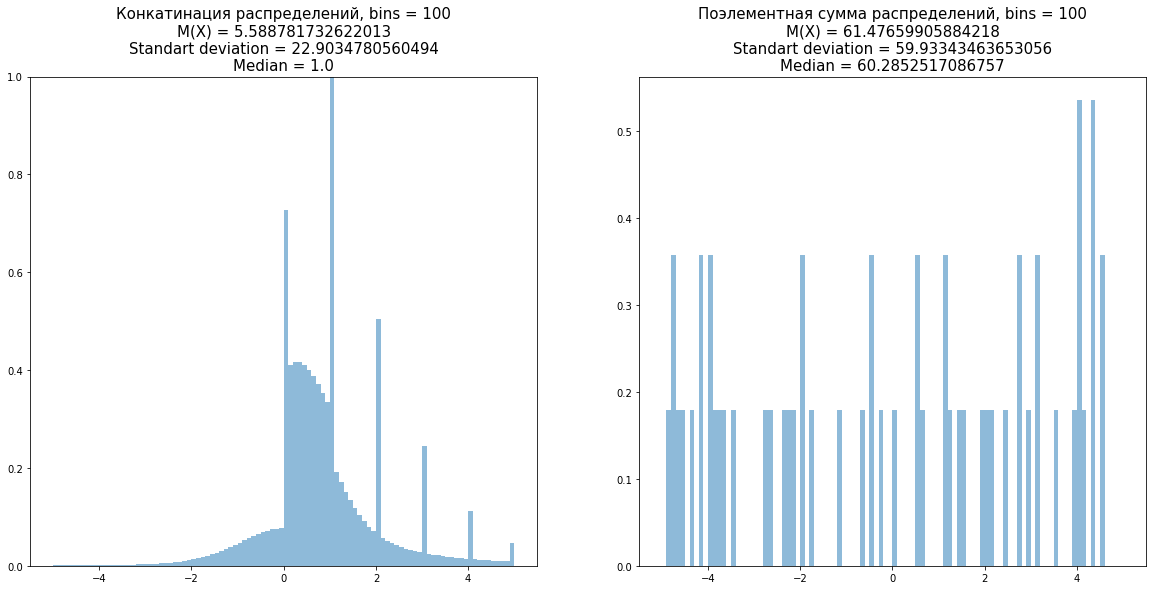

In [3]:
s = 1000000
concatArray = np.array([ spystats.binom(100, 0.5).rvs(size = s), #"Биномиальное распределение")
spystats.bernoulli(0.8).rvs(size = s), #"Распределение Бернулли")
spystats.geom(0.8).rvs(size = s), #"Геометрическое распределение")
spystats.poisson(2).rvs(size = s), #"Распределение Пуассона")
spystats.expon().rvs(size = s), #"Экспоненциальное распределение", (-1, 8), 100)
spystats.uniform().rvs(size = s), #"Равномерное распределение", (-1, 2), 100)
spystats.norm().rvs(size = s), #"Нормальное распределение", (-4, 4), 100)
spystats.chi2(2).rvs(size = s), #"Распределение хи-квадрат", (-1, 20), 100)
spystats.t(2).rvs(size = s), #"Распределение Стьюдента", (-25, 25), 100)
spystats.f(3, 3).rvs(size = s), #"Распределение Фишера", (-1, 5), 100)
spystats.weibull_min(2).rvs(size = s),]) #"Распределение Вейбулла", (-1, 5), 100)
sumArray = concatArray.sum(0)
concatArray = np.reshape(concatArray, s * 11)
print("SumArray: \n", sumArray)
print("Shape = ", sumArray.shape)
print("ConcatArray: \n", concatArray)
print("Shape = ", concatArray.shape)

fig = plt.figure(figsize=(20, 9))
ax1 = plt.subplot(1, 2, 1)

ax2 = plt.subplot(1, 2, 2)
ax1.set_ylim(0, 1)
ax1.hist(concatArray, bins=100, density=True, range=(-5, 5), alpha=0.5, label="Гистограмма выборки")
ax2.hist(sumArray, bins=100, density=True, range=(-5, 5), alpha=0.5, label="Гистограмма выборки")
ax1.set_title("{}, bins = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format("Конкатенация распределений", 100,
                                        concatArray.mean(), concatArray.std(), np.median(concatArray)), fontsize=15)
ax2.set_title("{}, bins = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format("Поэлементная сумма распределений", 100,
                                        sumArray.mean(), sumArray.std(), np.median(sumArray)), fontsize=15)
plt.show()